# ----------------------------------------------------------------------------

# WORLD Happiness Project 2023

**MEHR ALI QASIMI**

# ----------------------------------------------------------------------------

# Introduction


- The project contains many parts;

#Importing Libraries
#Data Content
#Reading and Analyzing Data
#Data Distributions in 2023
#Happiest and Unhappiest Countries in 2023
#Ladder Score Distribution by Countries in Map View
#The Most Generous and The Most Ungenerous Countries
#Generous Distribution by Countries in Map View
#Relationship Between Features



# ----------------------------------------------------------------------------

# importing libraries

### 1.Dataset prepration


In this section, we import used libraries during this notebook.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")

# sklearn import will introducted after EDA.
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [ ]:
# Reading and Analyzing Data
df = pd.read_csv("/content/WHR2023.csv")

# Display first 5 rows
df.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [ ]:
df.tail()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110
136,Afghanistan,1.859,0.033,1.923,1.795,7.324,0.341,54.712,0.382,-0.081,0.847,1.778,0.645,0.000,0.087,0.000,0.093,0.059,0.976


In [ ]:
#basic statistics of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ladder score,137.0,5.539796,1.139929,1.859,4.72400,5.6840,6.33400,7.804
Standard error of ladder score,137.0,0.064715,0.023031,0.029,0.04700,0.0600,0.07700,0.147
upperwhisker,137.0,5.666526,1.117421,1.923,4.98000,5.7970,6.44100,7.875
lowerwhisker,137.0,5.412971,1.163724,1.795,4.49600,5.5290,6.24300,7.733
Logged GDP per capita,137.0,9.449796,1.207302,5.527,8.59100,9.5670,10.54000,11.660
Social support,137.0,0.799073,0.129222,0.341,0.72200,0.8270,0.89600,0.983
Healthy life expectancy,136.0,64.967632,5.750390,51.530,60.64850,65.8375,69.41250,77.280
Freedom to make life choices,137.0,0.787394,0.112371,0.382,0.72400,0.8010,0.87400,0.961
Generosity,137.0,0.022431,0.141707,-0.254,-0.07400,0.0010,0.11700,0.531
Perceptions of corruption,137.0,0.725401,0.176956,0.146,0.66800,0.7740,0.84600,0.929


In [ ]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

In [ ]:
#checking null values in dataset or preprocessing data
df.isnull().sum()

Country name                                  0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       1
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           1
dtype: int64

In [ ]:
df.dropna(subset = ['Healthy life expectancy'], inplace=True)

In [ ]:
df.isnull().sum()

Country name                                  0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

##Data Distributions in 2023
#Unique Countries
#Count Regional Indicator
#Distribution of Remaining Features

In [ ]:
#Unique Countries
df['Country name'].unique()

array(['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands', 'Sweden',
       'Norway', 'Switzerland', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Canada', 'Ireland', 'United States', 'Germany',
       'Belgium', 'Czechia', 'United Kingdom', 'Lithuania', 'France',
       'Slovenia', 'Costa Rica', 'Romania', 'Singapore',
       'United Arab Emirates', 'Taiwan Province of China', 'Uruguay',
       'Slovakia', 'Saudi Arabia', 'Estonia', 'Spain', 'Italy', 'Kosovo',
       'Chile', 'Mexico', 'Malta', 'Panama', 'Poland', 'Nicaragua',
       'Latvia', 'Bahrain', 'Guatemala', 'Kazakhstan', 'Serbia', 'Cyprus',
       'Japan', 'Croatia', 'Brazil', 'El Salvador', 'Hungary',
       'Argentina', 'Honduras', 'Uzbekistan', 'Malaysia', 'Portugal',
       'South Korea', 'Greece', 'Mauritius', 'Thailand', 'Mongolia',
       'Kyrgyzstan', 'Moldova', 'China', 'Vietnam', 'Paraguay',
       'Montenegro', 'Jamaica', 'Bolivia', 'Russia',
       'Bosnia and Herzegovina', 'Colombia', 'Domin

In [ ]:
#number of countries
len(df['Country name'].unique())

137

In [ ]:
# Choose the numerical columns for further analysis
numerical_columns = ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
df[numerical_columns].describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,5.539796,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401
std,1.139929,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956
min,1.859000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000
25%,4.724000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000
50%,5.684000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000
75%,6.334000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000
max,7.804000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000


In [ ]:
# Create a function that displays the distribution of numerical data using both histograms and boxplots.
def show_distribution(var):
    var_min = df[var].min()
    var_mean = df[var].mean()
    var_median = df[var].median()
    var_mode = df[var].mode()[0]
    var_max = df[var].max()

    # Histogram
    fig, ax = plt.subplots(2, 1, figsize = (8,8))
    sns.histplot(df, x = var, kde = True, color = 'red', alpha = 0.2, ax = ax[0])
    ax[0].set_ylabel("Frequency")

    ax[0].axvline(x = var_min, color = 'gray', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_mean, color = 'blue', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_median, color = 'brown', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_mode, color = 'cyan', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_max, color = 'gray', linewidth = 2, linestyle = "--")

    # Box plot
    sns.boxplot(df, x = var, width = 0.3, ax = ax[1],)
    ax[1].set_xlabel("Value")

    fig.suptitle("Data Distribution - " + var, size = 15)
    fig.show()

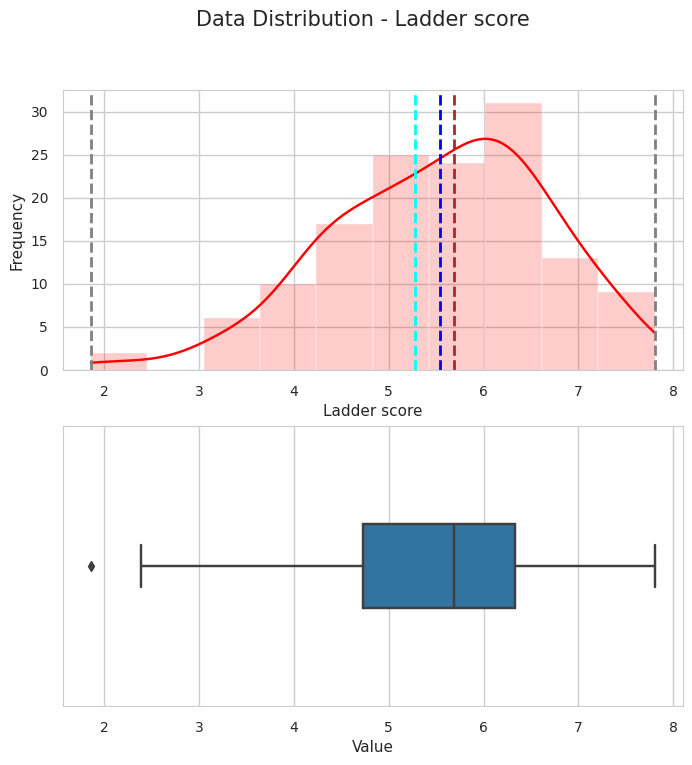

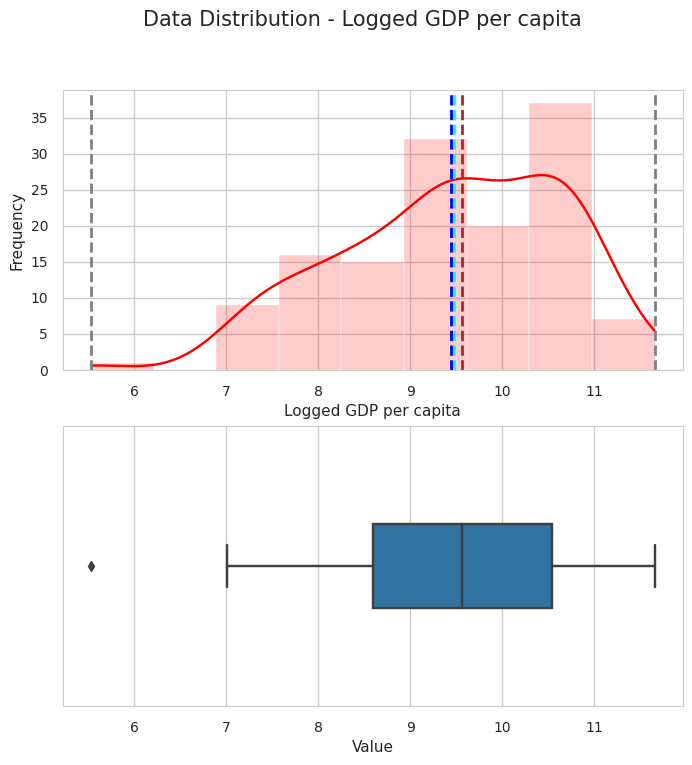

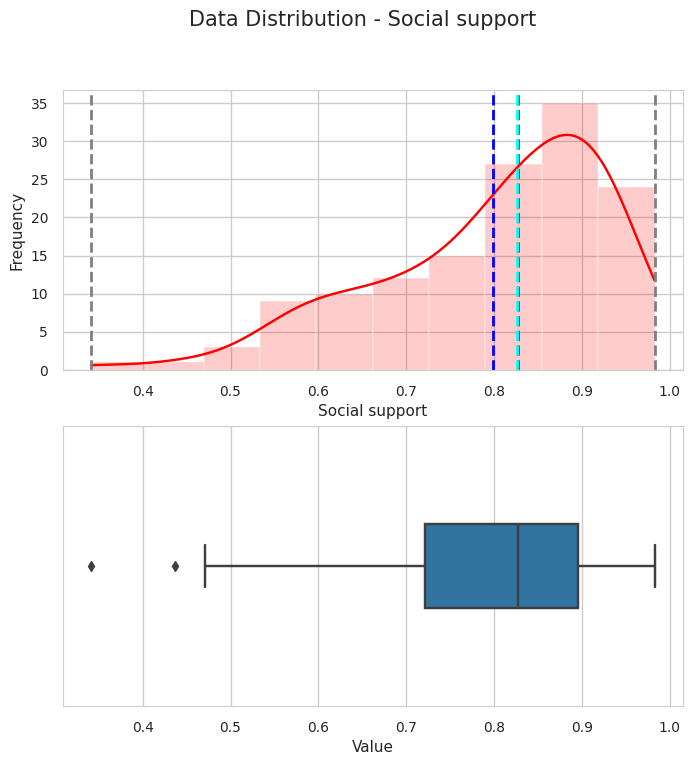

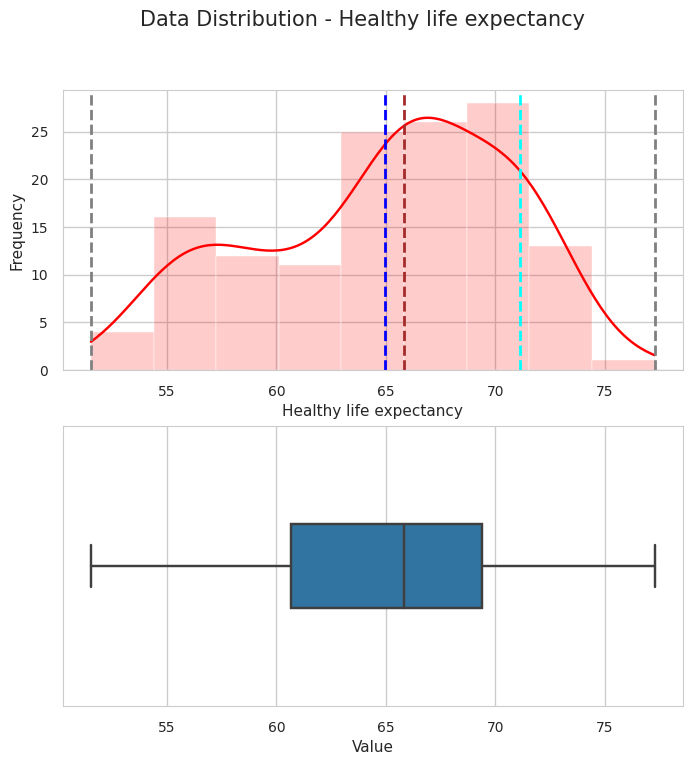

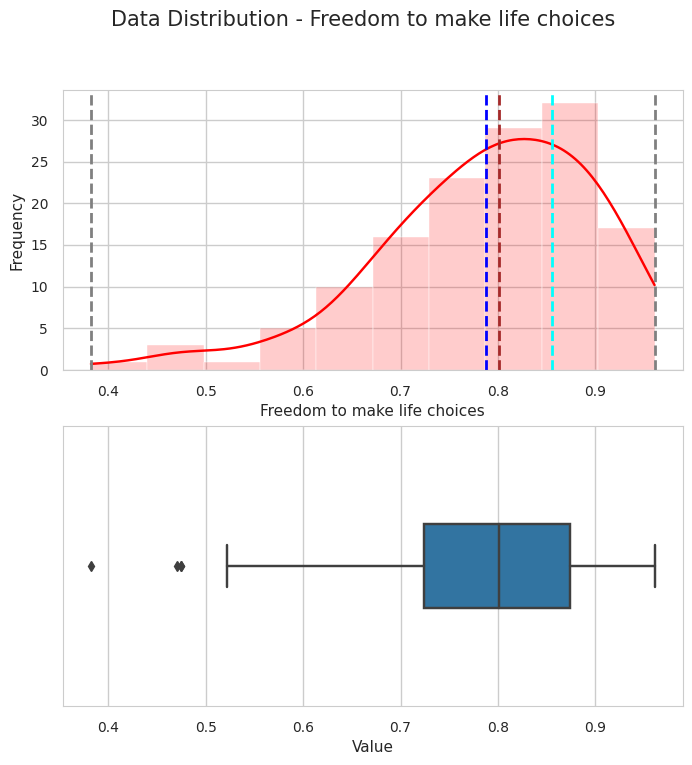

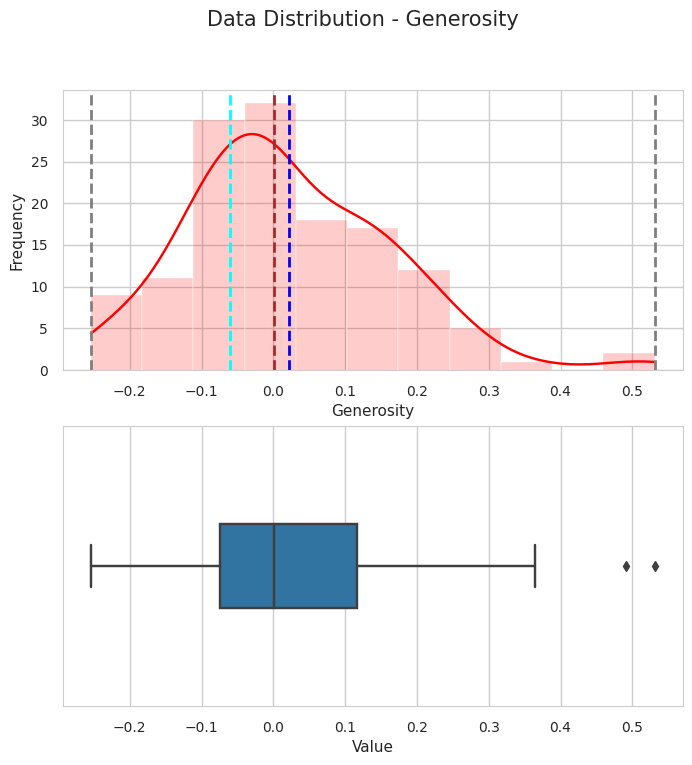

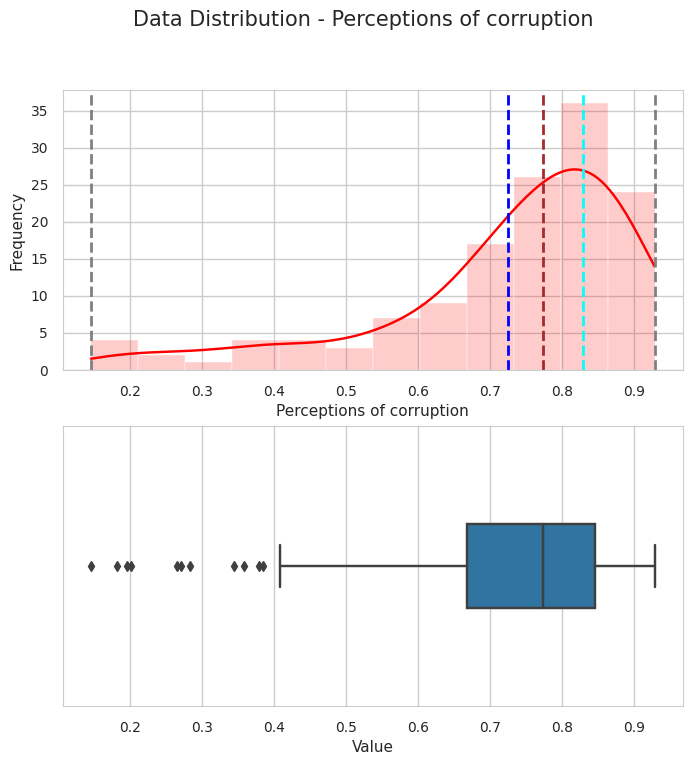

In [ ]:
# Call show_distribution function
for column in numerical_columns:
    show_distribution(column)

###Before finding out the linear regression between the ladder score and the relatively more influential factor, let’s first check out the correlations.

In [ ]:
X = df['Ladder score'].values
Y= df['Logged GDP per capita'].values
mean_X =np.mean(X)
mean_Y =np.mean(Y)
total_num = len(X)
numerator = 0
denominator =0
for i in range(total_num):
    numerator += (X[i] - mean_X)*(Y[i] - mean_Y)
    denominator += (X[i] - mean_X)**2
beta_1 = numerator/denominator
beta_0 = mean_Y - beta_1*mean_X
print(beta_1,beta_0)

0.8307260780971142 4.847742931211963


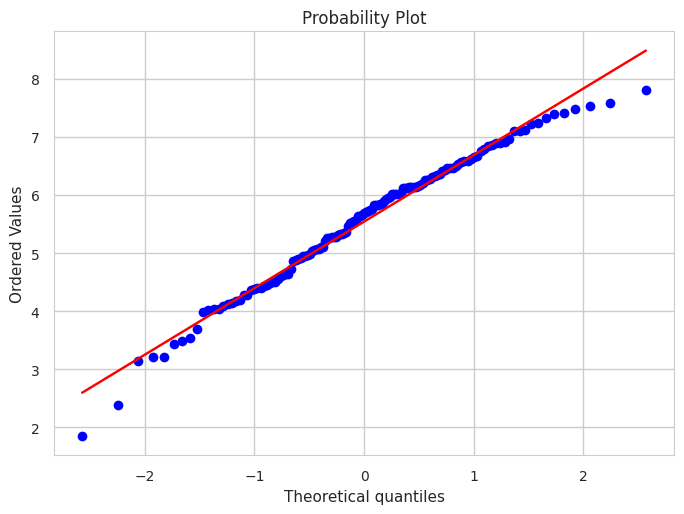

In [ ]:
import pylab
import scipy.stats as stats
measurements = (df['Ladder score'])
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

####Generate a heatmap to identify the correlation

<Axes: >

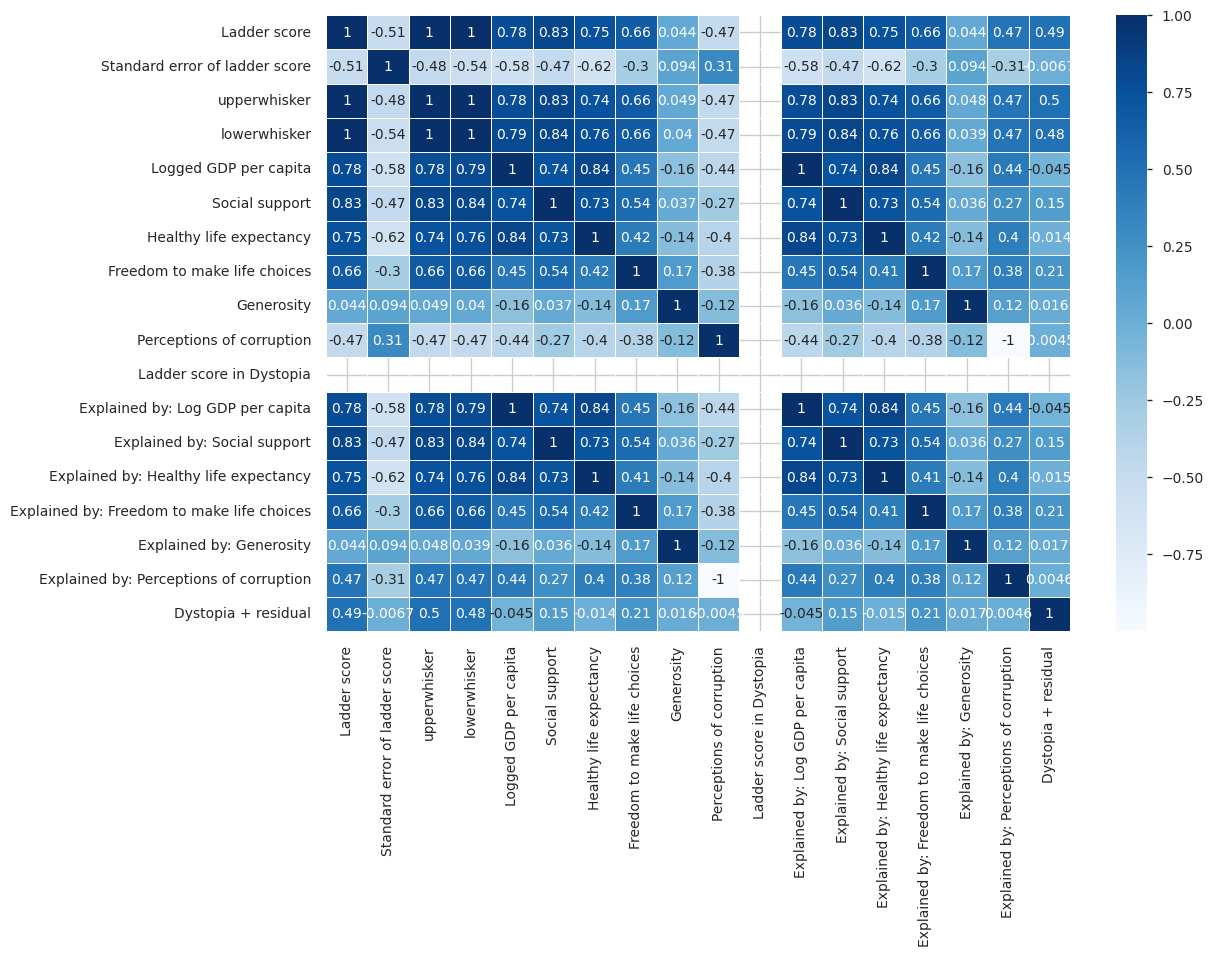

In [ ]:
# Generate a heatmap to identify the correlation
corr = df.corr()
fig = plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap = 'Blues', linewidth = 0.5, annot = True)

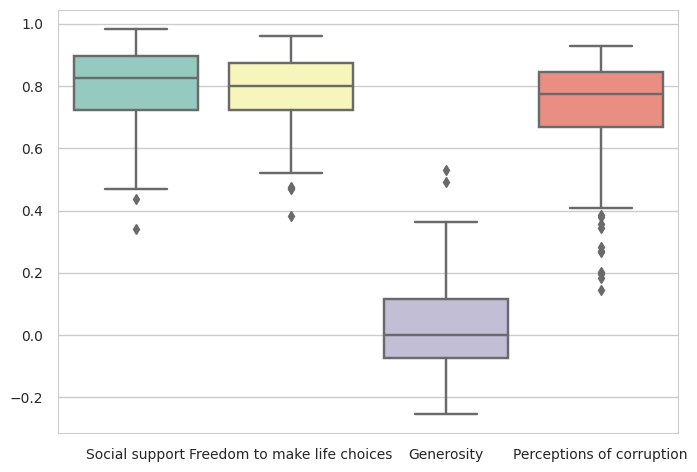

In [ ]:
#Distribution of Remaining Features
#1
list_features = ["Social support", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]
sns.boxplot(data = df.loc[:,list_features], orient = 'v', palette = 'Set3')
plt.show()

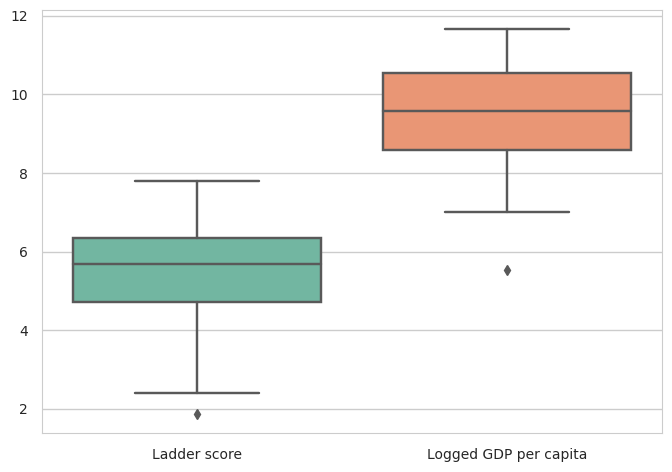

In [ ]:
#Distribution of Remaining Features
#2
list_features = ["Ladder score", "Logged GDP per capita"]
sns.boxplot(data = df.loc[:,list_features], orient = 'v', palette = 'Set2')
plt.show()



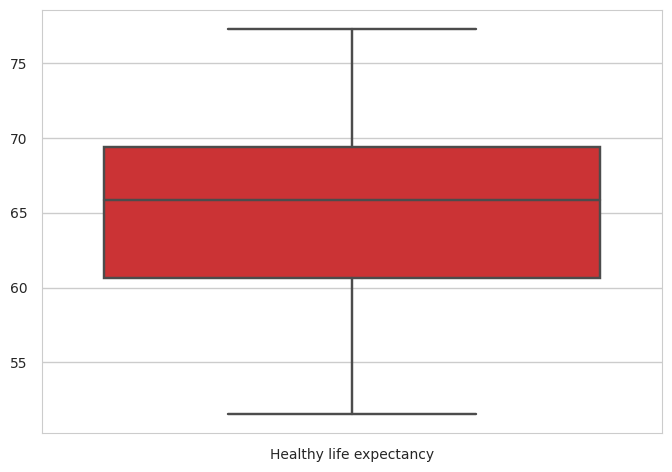

In [ ]:
#Distribution of Remaining Features
#3
list_features = ["Healthy life expectancy"]
sns.boxplot(data = df.loc[:,list_features], orient = 'v', palette = "Set1")
plt.show()

##Happiest and Unhappiest Countries in 2023

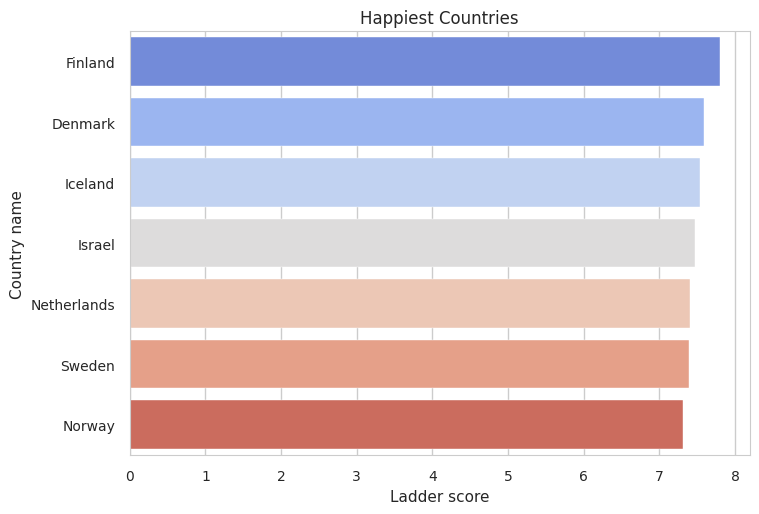

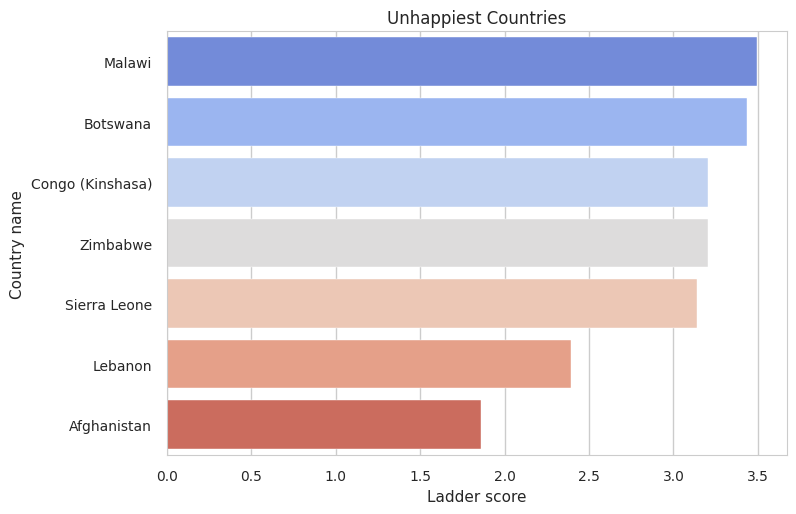

In [ ]:
df_happiest = df[(df.loc[:,"Ladder score"] > 7.3)]
df_unhappiest = df[(df.loc[:, "Ladder score"] < 3.5)]

#happiest countries
sns.barplot (x = "Ladder score", y = "Country name", data = df_happiest, palette = "coolwarm")
plt.title("Happiest Countries")
plt.show()

#unhappiest countries (according to Ladder score)
sns.barplot (x = "Ladder score", y = "Country name", data = df_unhappiest, palette = "coolwarm")
plt.title("Unhappiest Countries")
plt.show()

##Ladder Score Distribution by Countries in Map View

In [ ]:
fig = px.choropleth(df.sort_values("Country name"),
                   locations = "Country name",
                   color = "Ladder score",
                   locationmode = "country names",
                   animation_frame = "Country name")
fig.update_layout(title = "Life Ladder Comparison by Countries")
fig.show()

##The Most Generous and The Most Ungenerous Countries

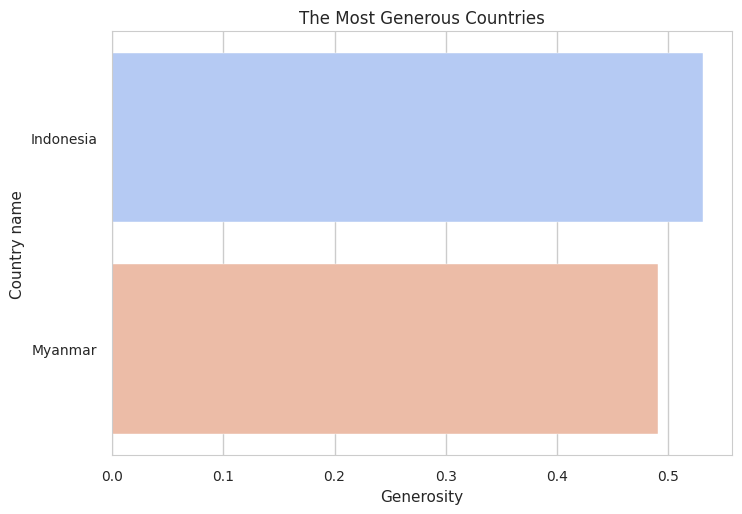

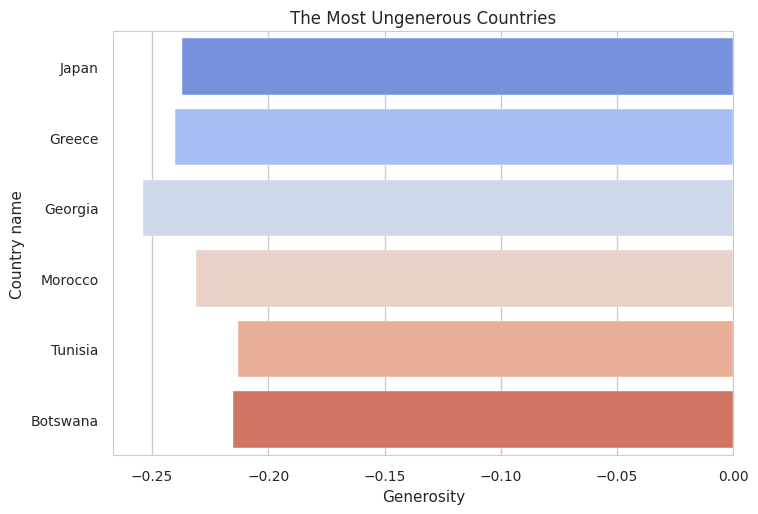

In [ ]:
df_generous = df[df.loc[:,"Generosity"] > 0.4]
df_ungenerous = df[df.loc[:, "Generosity"] < -0.2]
#the most generous countries (according to generosity score)
sns.barplot(x = "Generosity", y = "Country name", data = df_generous, palette = "coolwarm")
plt.title("The Most Generous Countries")
plt.show()

sns.barplot(x = "Generosity", y = "Country name", data = df_ungenerous, palette = "coolwarm")
plt.title("The Most Ungenerous Countries")
plt.show()

##Generous Distribution by Countries in Map View

In [ ]:
fig = px.choropleth(df.sort_values("Country name"),
                   locations = "Country name",
                   color = "Generosity",
                   locationmode = "country names",
                   animation_frame = "Country name")
fig.update_layout(title = "Generosity Comparison by Countries")
fig.show()

#### Relationship Between Features

In [ ]:
#dropping cloumns starting with "explained by:"
columns_to_drop = [col for col in df.columns if col.startswith('Explained by:')]

df.drop(columns = columns_to_drop, inplace= True)
df.drop(columns = "Country name", inplace = True)
df.head()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Dystopia + residual
0,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,2.363
1,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,2.084
2,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,2.250
3,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,2.691
4,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,2.110


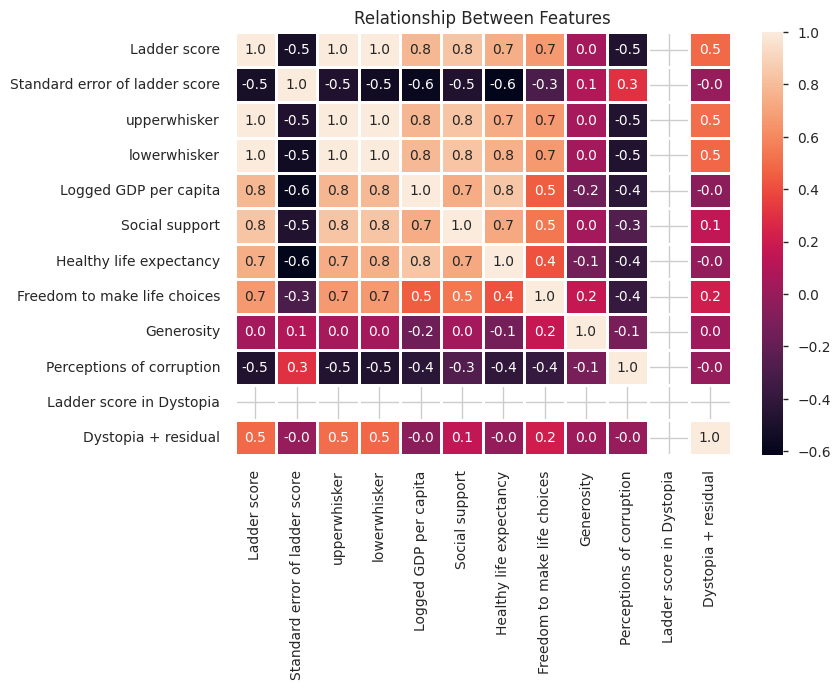

In [ ]:
sns.heatmap(df.corr(), annot = True, fmt = '.1f', linewidth = 1.0)
plt.title("Relationship Between Features")
plt.show()

##EDA

####In this part, I'm going to explore dataset more in detail:

In [ ]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,137.000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,136.000000
mean,5.539796,0.064715,5.666526,5.412971,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401,1.778,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898,1.777838
std,1.139929,0.023031,1.117421,1.163724,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956,0.000,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723,0.504390
min,1.859000,0.029000,1.923000,1.795000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,4.724000,0.047000,4.980000,4.496000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000,1.778,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000,1.555250
50%,5.684000,0.060000,5.797000,5.529000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000,1.778,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000,1.848500
75%,6.334000,0.077000,6.441000,6.243000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000,1.778,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000,2.078750
max,7.804000,0.147000,7.875000,7.733000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,1.778,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000


###let's see the correlation matrix to better understand possible correlations:

In [ ]:
corr_df = df.corr()
fig = px.imshow(corr_df, text_auto=True)
fig.update_layout(height=1000, margin={'l': 0, 'r': 0, 't': 0, 'b': 0})
fig.update_coloraxes(showscale=False)
fig.show()

##Correlations
####Some columns seem to be correlated to other columns, for this reason I'm going to filtering these correlations and analyze only columns which seem to be significantly correlated.

In [ ]:
highly_correlated_columns = list()
for column in corr_df.columns:
     temp_dict = corr_df[column].to_dict()
     for key in temp_dict.keys():
          if np.abs(temp_dict[key]) > 0.5 and np.abs(temp_dict[key]) != 1.0:

               if column not in highly_correlated_columns:
                    highly_correlated_columns.append(column)
                    highly_correlated_columns.append(key)
               elif key not in highly_correlated_columns:
                    highly_correlated_columns.append(key)


print("Significantly correlated columns: ", highly_correlated_columns)

Significantly correlated columns:  ['Ladder score', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Dystopia + residual', 'Generosity', 'Explained by: Generosity', 'Perceptions of corruption', 'Explained by: Perceptions of corruption']


##Model training
####In this part I'm going to train some models to predict "Life Ladder" in 2023, using all highly correlated columns.

####I will use K-nearest neighbors regressor, Decision Tree Regressor, Random Forest Regressor and Gradient Boosting Regressor.

##Data splitting and scaling¶
####In this part i will use train_test_split with shuffle=False. These measurements are taken sequantially, year after year, and so, I will scale data.

In [ ]:
target_column = highly_correlated_columns[0]
features_columns = highly_correlated_columns[1:]
target_column, features_columns

In [ ]:

X = df[features_columns]
y = df[target_column]
X_test_2023 = df[features_columns]
X_test_2023 = X_test_2023.dropna()
y_test_2023 = df.loc[X_test_2023.index, target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, shuffle=False)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test_2023 = scaler.transform(X_test_2023)

##Cross validation
####I will use GridSearchCV to cross validate model and the default bagging which is Kfold, also I will tune "cv" parameter and use the best one. Obviously, I will take model with best parameters.

##K-Nearest Nighbors

In [ ]:
knnr_cv = GridSearchCV(
    estimator=KNNR(),
    param_grid={
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'] # two way to influence prediction: uniform all weight are equal, distance close the point is more influece it has.
    },
    cv=7, # Currently the default value is 5 after some try i found that after value 7 for cv performance goes down.
    n_jobs=4
)
knnr_cv.fit(X_train, y_train)
knnr_best_estimator = knnr_cv.best_estimator_
knnr_cv.best_params_, knnr_cv.best_score_

({'n_neighbors': 2, 'weights': 'distance'}, -6.938180129237874)

#Decision tree regressor

In [ ]:
dtr_cv = GridSearchCV(
    estimator=DTR(random_state=23),
    param_grid={
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3]
    },
    cv=5, # For this model 5 is good
    n_jobs=4
)

dtr_cv.fit(X_train, y_train)
dtr_best_estimator = dtr_cv.best_estimator_
dtr_cv.best_params_, dtr_cv.best_score_

({'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1},
 -1.580678843940745)

#Random forest regressor

In [ ]:
rfr_cv = GridSearchCV(
    estimator=RFR(random_state=23),
    param_grid={
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3]
    },
    cv=7,
    n_jobs=4
)

rfr_cv.fit(X_train, y_train.values.ravel())
rfr_best_estimator = rfr_cv.best_estimator_
rfr_cv.best_estimator_, rfr_cv.best_score_

(RandomForestRegressor(max_depth=9, max_features=None, n_estimators=10,
                       random_state=23),
 -1.6068109944855211)

#Gradient Boosting Regressor

In [ ]:
gbr_cv = GridSearchCV(
    estimator=GBR(random_state=23),
    param_grid={
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3]
    },
    cv=6,
    n_jobs=4
)

gbr_cv.fit(X_train, y_train)
gbr_best_estimator = gbr_cv.best_estimator_
gbr_cv.best_estimator_, gbr_cv.best_score_

(GradientBoostingRegressor(max_depth=7, n_estimators=10, random_state=23),
 -5.039760243814841)

#Predictions

In [ ]:
knnr_pred = knnr_best_estimator.predict(X_test)
dtr_pred = dtr_best_estimator.predict(X_test)
rfr_pred = rfr_best_estimator.predict(X_test)
gbr_pred = gbr_best_estimator.predict(X_test)

knnr_pred_2023 = knnr_best_estimator.predict(X_test_2023)
dtr_pred_2023 = dtr_best_estimator.predict(X_test_2023)
rfr_pred_2023 = rfr_best_estimator.predict(X_test_2023)
gbr_pred_2023 = gbr_best_estimator.predict(X_test_2023)

knnr_score = mean_absolute_error(y_test, knnr_pred)
dtr_score = mean_absolute_error(y_test, dtr_pred)
rfr_score = mean_absolute_error(y_test, rfr_pred)
gbr_score = mean_absolute_error(y_test, gbr_pred)

knnr_score_2023 = mean_absolute_error(y_test_2023, knnr_pred_2023)
dtr_score_2023 = mean_absolute_error(y_test_2023, dtr_pred_2023)
rfr_score_2023 = mean_absolute_error(y_test_2023, rfr_pred_2023)
gbr_score_2023 = mean_absolute_error(y_test_2023, gbr_pred_2023)

print(f"knnr MAE: {knnr_score}")
print(f"dtr MAE: {dtr_score}")
print(f"rfr MAE: {rfr_score}")
print(f"gbr MAE: {gbr_score}")
print(30*"#")
print(f"knnr MAE: {knnr_score_2023}")
print(f"dtr MAE: {dtr_score_2023}")
print(f"rfr MAE: {rfr_score_2023}")
print(f"gbr MAE: {gbr_score_2023}")

knnr MAE: 0.9965278811300305
dtr MAE: 0.8766764705882355
rfr MAE: 0.8545470588235297
gbr MAE: 1.2682042909016602
##################################################
knnr MAE: 0.2491319762639101
dtr MAE: 0.23190752801120454
rfr MAE: 0.22489485294117656
gbr MAE: 0.4753468617815405
